In [22]:
from rdkit.Chem import AllChem as Chem

In [47]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit import RDLogger
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)
from rdkit.Chem import rdMolDescriptors as rdescriptors
from rdkit.Chem import Descriptors

In [17]:
drugbank = [mol for mol in Chem.SDMolSupplier("../data/drugbank.sdf") if mol]

In [38]:
def mw_mol (mol):
   return rdescriptors.CalcExactMolWt(mol)<500

In [71]:
def hb_mol (mol):
    return rdescriptors.CalcNumLipinskiHBA(mol)<=10

In [72]:
def hd_mol (mol):
    return rdescriptors.CalcNumLipinskiHBD(mol)<=5

In [73]:
def lp_mol (mol):
    return Descriptors.MolLogP(mol)<5

In [74]:
rings = [len(Chem.GetSSSR(mol)) for mol in drugbank]
mws = [mw_mol(mol) for mol in drugbank] 
hbs = [hb_mol(mol) for mol in drugbank] 
hds = [hd_mol(mol) for mol in drugbank] 
lps = [lp_mol(mol) for mol in drugbank]

In [75]:
tr = [sum(ds)>2 for ds in zip(mws, hbs, hds, lps)]

In [76]:
sum(tr)/len(tr)

0.8414325842696629

In [77]:
f"{sum(tr)/len(tr):.0%}"

'84%'

In [26]:
sum(rings)/len(rings), sum(mws)/len(mws)

(2.451123595505618, 356.41730297698126)

In [5]:
cubane = Chem.MolFromSmiles("C12C3C4C1C5C2C3C45")

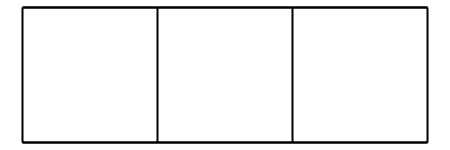

In [6]:
cubane

In [20]:
len(Chem.GetSSSR(cubane)), [[a for a in v] for v in Chem.GetSSSR(cubane)]

(5, [[0, 3, 2, 1], [0, 5, 4, 3], [0, 5, 6, 1], [1, 6, 7, 2], [3, 4, 7, 2]])

In [25]:
rdescriptors.CalcExactMolWt(cubane)

104.062600256